In [1]:
import numpy as np
import pandas as pd
import torch
import random
import copy
import sys 
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader, Dataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform

sys.path.insert(0, '../../util/')
#from dpp import *
import dpp
import mcdpp
import coreset
import utils as utils

In [2]:
dquery = np.load("../../data/synthetic_nonlinear/synthetic_query_v1.npy").astype(np.float32)
dtest = np.load("../../data/synthetic_nonlinear/synthetic_test_v1.npy").astype(np.float32)
dcf = np.load("../../data/synthetic_nonlinear/synthetic-plaincf.npy").astype(np.float32)
dccf = np.load("../../data/synthetic_nonlinear/synthetic-plaincf-2.npy").astype(np.float32)

query_x, query_y = dquery[:, 0:2], dquery[:, 2:3]
cf_x, cf_y = dcf[:, 0:2], dcf[:, 2:3]
ccf_x, ccf_y = dccf[:, 0:2], dccf[:, 2:3]
test_x, test_y = dtest[:, 0:2], dtest[:, 2:3]

scaler = MinMaxScaler()
query_x = scaler.fit_transform(query_x)
test_x = scaler.transform(test_x)
cf_x = scaler.transform(cf_x)
ccf_x = scaler.transform(ccf_x)

In [7]:
result = coreset.find_core_set(query_x, 20)

In [8]:
unif_smpl = np.random.permutation(len(query_x))[:len(result)]

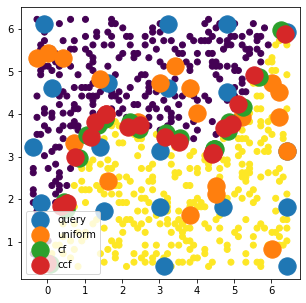

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.scatter(dquery[:, 0], dquery[:, 1],  c = dquery[:, 2])
ax.scatter(dquery[result, 0], dquery[result, 1], s = 300, label = "query")
ax.scatter(dquery[unif_smpl, 0], dquery[unif_smpl, 1], s = 300, label = "uniform")
ax.scatter(dcf[result, 0], dcf[result, 1], s = 300, label = 'cf')
ax.scatter(dccf[result, 0], dccf[result, 1], s = 300, label = 'ccf')
ax.legend()
plt.show()

In [23]:
print(len(L))

750
